librairies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json as js

data

In [2]:
with open("outputN100sweep10000.json", "r") as file:
    dic = js.load(file)

print(dic)

{'effective sweep list': [1000, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500], 'maximum bond dimension per tebd step': [72, 86, 98, 107, 116, 122, 128, 133, 137, 140, 143, 145, 146, 148, 149, 150, 151, 151, 151], 'energy sweep list': [-0.33918899960146226, -0.39362339503624916, -0.41494403609568503, -0.42458479989789155, -0.42977826210997044, -0.4329842877714136, -0.4351498045006727, -0.43669328889087355, -0.4378271292319544, -0.4386747057905804, -0.4393163232000657, -0.4398082871730382, -0.4401915018702906, -0.4404959574304186, -0.4407435409954988, -0.44095005407035226, -0.44112675066662793, -0.44128152498142775, -0.44141982272272556], 'Trotter-Suzuki time step': 0.001, 'sweep range': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000], 'magnetization sweep list': [-0.002587402410472858, -0.00252820288357882, -0.003150878016167206, -0.0038153082585379292, -0.004456034546263976, 

Text(0.5, 1.0, 'cutoff = 1e-15, delat_tau = 1e-3, N=100')

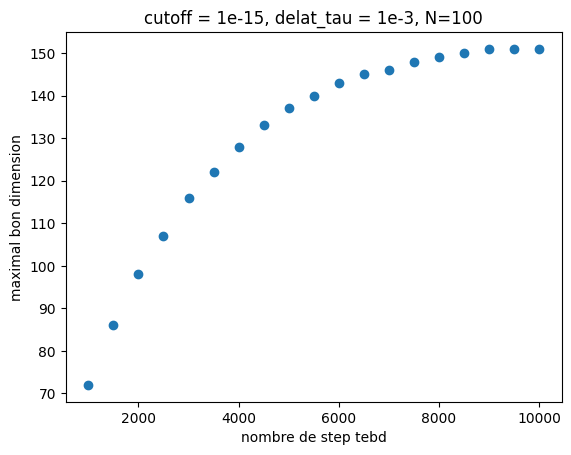

In [3]:
fig, axes = plt.subplots()
axes.scatter(dic["sweep range"], dic["maximum bond dimension per tebd step"])
axes.set_xlabel("nombre de step tebd")
axes.set_ylabel("maximal bon dimension")
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3, N=100")


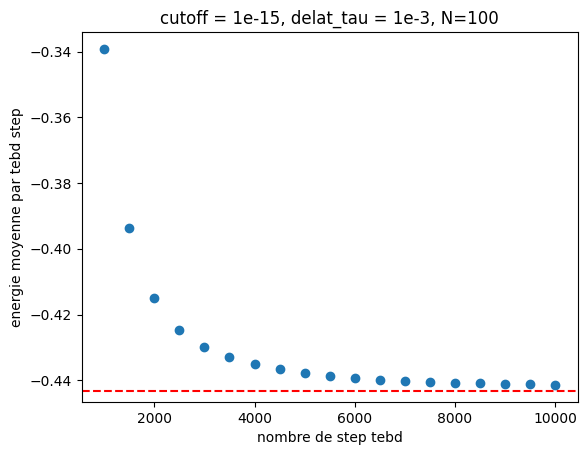

In [7]:
E = 1/4 - np.log(2)

fig, axes = plt.subplots()
axes.scatter(dic["sweep range"], dic["energy sweep list"])
axes.set_xlabel("nombre de step tebd")
axes.set_ylabel("energie moyenne par tebd step")
axes.set_title("cutoff = 1e-15, delat_tau = 1e-3, N=100")
axes.axhline(y=E, color='red', linestyle='--')